In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [18]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, Input
from keras.layers import InputLayer, MaxPooling2D, Flatten, Dense, Conv2D, Dropout
from keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from PIL.Image import open

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline
IMAGE_DATASET = "C:/Users/Nisha/Desktop/Brain tumour detection project/archive (5)/Brain Tumor"
IMAGE_DATASET_RAW = r"C:\Users\Nisha\Desktop\Brain tumour detection project\archive (5)\Brain Tumor"


IMG_HEIGHT = 224
IMG_WIDTH = 224
EPOCHS = 50


file=os.listdir(IMAGE_DATASET)

In [19]:
plt.figure(figsize=(20,20))
test_folder="C:/Users/Nisha/Desktop/Brain tumour detection project/archive (5)/Brain Tumor/Image3202.jpg" 
img=mpimg.imread(test_folder)
print(img.size)

172800


<Figure size 1440x1440 with 0 Axes>

In [20]:
# We will import the csv file containing the features and the classes of the images

cortex_df = pd.read_csv("C:/Users/Nisha/Desktop/Brain tumour detection project/archive (5)/Brain Tumor.csv")
cortex_df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [21]:
print(cortex_df.shape)

(3762, 15)


In [22]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [23]:
test_folder="C:/Users/Nisha/Desktop/Brain tumour detection project/archive (5)/Brain Tumor"

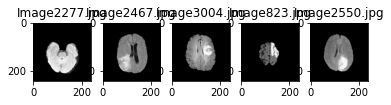

In [24]:
for i in range(5):
    
    file = random.choice(os.listdir(test_folder))
    
    image_path= os.path.join(test_folder, file)
    
    img=mpimg.imread(image_path)
   
    ax=plt.subplot(1,5,i+1)
     
    ax.title.set_text(file)
     
    plt.imshow(img)

In [25]:
dataset_df = pd.DataFrame()

dataset_df["Image"] = cortex_df["Image"]
dataset_df["Class"] = cortex_df["Class"]

path_list = []

for img_path in os.listdir(IMAGE_DATASET):
    path_list.append( os.path.join(IMAGE_DATASET,img_path))
path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in path_list}
dataset_df["paths"] = cortex_df["Image"].map(path_dict.get)
dataset_df["pixels"] = dataset_df["paths"].map(lambda x:np.asarray(open(x).resize((IMG_HEIGHT,IMG_WIDTH))))
dataset_df.head(10)

,Image,Class,paths,pixels
0,Image1,0,C:/Users/Nisha/Desktop/Brain tumour detection ...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,Image2,0,C:/Users/Nisha/Desktop/Brain tumour detection ...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,Image3,1,C:/Users/Nisha/Desktop/Brain tumour detection ...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,Image4,1,C:/Users/Nisha/Desktop/Brain tumour detection ...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,Image5,0,C:/Users/Nisha/Desktop/Brain tumour detection ...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
5,Image6,0,C:/Users/Nisha/Desktop/Brain tumour detection ...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
6,Image7,0,C:/Users/Nisha/Desktop/Brain tumour detection ...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
7,Image8,0,C:/Users/Nisha/Desktop/Brain tumour detection ...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
8,Image9,0,C:/Users/Nisha/Desktop/Brain tumour detection ...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
9,Image10,1,C:/Users/Nisha/Desktop/Brain tumour detection ...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [26]:
dataset_df.tail()

,Image,Class,paths,pixels
3757,Image3758,0,C:/Users/Nisha/Desktop/Brain tumour detection ...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3758,Image3759,0,C:/Users/Nisha/Desktop/Brain tumour detection ...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3759,Image3760,0,C:/Users/Nisha/Desktop/Brain tumour detection ...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3760,Image3761,0,C:/Users/Nisha/Desktop/Brain tumour detection ...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3761,Image3762,0,C:/Users/Nisha/Desktop/Brain tumour detection ...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [27]:
path_list[:5]

['C:/Users/Nisha/Desktop/Brain tumour detection project/archive (5)/Brain Tumor\\Image1.jpg',
 'C:/Users/Nisha/Desktop/Brain tumour detection project/archive (5)/Brain Tumor\\Image10.jpg',
 'C:/Users/Nisha/Desktop/Brain tumour detection project/archive (5)/Brain Tumor\\Image100.jpg',
 'C:/Users/Nisha/Desktop/Brain tumour detection project/archive (5)/Brain Tumor\\Image1000.jpg',
 'C:/Users/Nisha/Desktop/Brain tumour detection project/archive (5)/Brain Tumor\\Image1001.jpg']

In [28]:
dataset_df["paths"].head(5)

0    C:/Users/Nisha/Desktop/Brain tumour detection ...
1    C:/Users/Nisha/Desktop/Brain tumour detection ...
2    C:/Users/Nisha/Desktop/Brain tumour detection ...
3    C:/Users/Nisha/Desktop/Brain tumour detection ...
4    C:/Users/Nisha/Desktop/Brain tumour detection ...
Name: paths, dtype: object

In [29]:
len(dataset_df)

3762

In [30]:
image_list = []
for i in range(len(dataset_df)):
    brain_image = dataset_df["pixels"][i].astype(np.float32)
    brain_image /= 255
    image_list.append(brain_image)
X = np.array(image_list)
print(X.shape)

(3762, 224, 224, 3)


In [31]:
y = np.array(dataset_df.Class)
y.shape

(3762,)

In [32]:
print(X[:1])

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [33]:
print(y[:5]) 

[0 0 1 1 0]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('The shape of the X_train :'+' '+str(X_train.shape))
print('The size of the X_train :'+' '+str(X_train.shape[0]))
print('The shape of the X_test :'+' '+str(X_test.shape))
print('The size of the X_test:'+' '+str(X_test.shape[0]))

The shape of the X_train : (3009, 224, 224, 3)
The size of the X_train : 3009
The shape of the X_test : (753, 224, 224, 3)
The size of the X_test: 753


In [36]:
def model(input_shape):
    
#     res_conv = ResNet50(include_top=False, weights="imagenet", input_tensor=None, input_shape=input_shape, pooling=None)
    model = Sequential()
    model.add(Input(shape=input_shape))
    
    model.add(Conv2D(16, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(Conv2D(16, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last", padding='same'))
            
    model.add(Conv2D(32, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(Conv2D(32, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last", padding='same'))
    
    model.add(Conv2D(64, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(Conv2D(64, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last", padding='same'))
    
    
    
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dense(128, activation="relu"))
    
    
    model.add(Dense(1, activation="sigmoid"))    # Never use sigmoid for binary classification
    
    return model


In [37]:
model = model(input_shape = (IMG_HEIGHT, IMG_WIDTH, 3))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                    

In [39]:
optimizer = SGD(learning_rate=0.01)
loss_fn = BinaryCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [40]:
# Training the model
history = model.fit(x=X_train, y=y_train, epochs=EPOCHS, batch_size=10)

Epoch 1/50


C:\Users\Nisha\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


301/301 [==============================] - 26s 54ms/step - loss: 0.6443 - accuracy: 0.6517
Epoch 2/50
301/301 [==============================] - 16s 52ms/step - loss: 0.5133 - accuracy: 0.7664
Epoch 3/50
301/301 [==============================] - 16s 51ms/step - loss: 0.4776 - accuracy: 0.7926
Epoch 4/50
301/301 [==============================] - 15s 51ms/step - loss: 0.4441 - accuracy: 0.8029
Epoch 5/50
301/301 [==============================] - 16s 52ms/step - loss: 0.4110 - accuracy: 0.8272
Epoch 6/50
301/301 [==============================] - 16s 52ms/step - loss: 0.3654 - accuracy: 0.8405
Epoch 7/50
301/301 [==============================] - 16s 53ms/step - loss: 0.3290 - accuracy: 0.8584
Epoch 8/50
301/301 [==============================] - 16s 54ms/step - loss: 0.3006 - accuracy: 0.8760
Epoch 9/50
301/301 [==============================] - 16s 52ms/step - loss: 0.2678 - accuracy: 0.8953
Epoch 10/50
301/301 [==============================] - 16s 53ms/step - loss: 0.2542 - accurac

In [41]:
model.save("BrainTumorv7")

INFO:tensorflow:Assets written to: BrainTumorv7\assets


INFO:tensorflow:Assets written to: BrainTumorv7\assets


In [47]:
#!tar - zcvf BrainTumorv7.tar.gz /kaggle/working/BrainTumorv7

In [42]:
loss = history.history["loss"]
acc = history.history["accuracy"]

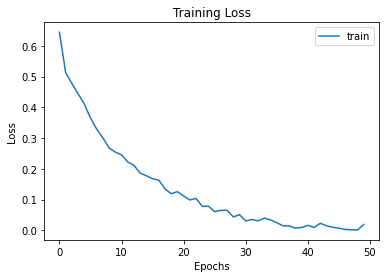

In [43]:
epoch = np.arange(EPOCHS)
plt.plot(epoch, loss)
# plt.plot(epoch, val_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend(['train', 'val'])

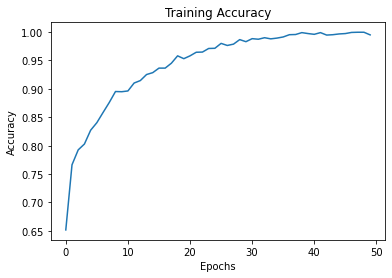

In [44]:
epoch = np.arange(EPOCHS)
plt.plot(epoch, acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy');

In [45]:
eval_score = model.evaluate(X_test, y_test)
print("Test loss:", eval_score[0])
print("Test accuracy:", eval_score[1])

C:\Users\Nisha\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


24/24 [==============================] - 2s 51ms/step - loss: 0.1641 - accuracy: 0.9668
Test loss: 0.16405567526817322
Test accuracy: 0.9667994976043701


In [46]:
eval_score = model.evaluate(X_train, y_train)
print("Train loss:", eval_score[0])
print("Train accuracy:", eval_score[1])

95/95 [==============================] - 5s 50ms/step - loss: 0.0061 - accuracy: 0.9983
Train loss: 0.006064833141863346
Train accuracy: 0.9983383417129517
